In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, root_mean_squared_error as rmse, r2_score, accuracy_score, roc_curve, roc_auc_score, log_loss, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [57]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

data = pd.read_csv('/Users/xin/Files/Current_studies/machine_learning/project/data/train.csv')
data
#data_val = pd.read_csv('/Users/xin/Files/Current_studies/machine_learning/project/data/test.csv')
#data_val

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [58]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [59]:
data.dropna(axis=0)
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

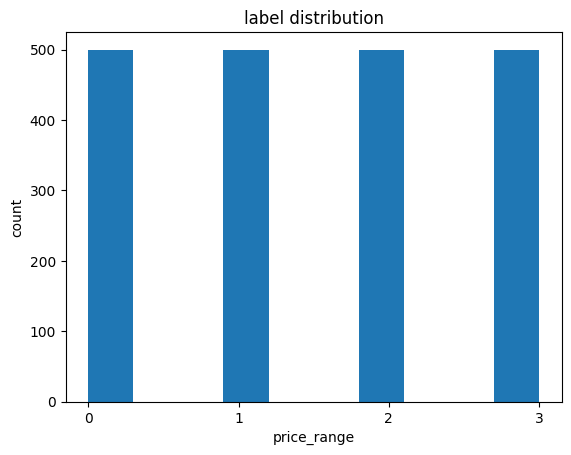

In [60]:
fig,ax = plt.subplots()
ax.hist(data["price_range"])
ax.set_title("label distribution")
ax.set_xlabel("price_range")
ax.set_ylabel("count")
ax.set_xticks([0,1,2,3])

plt.show()

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


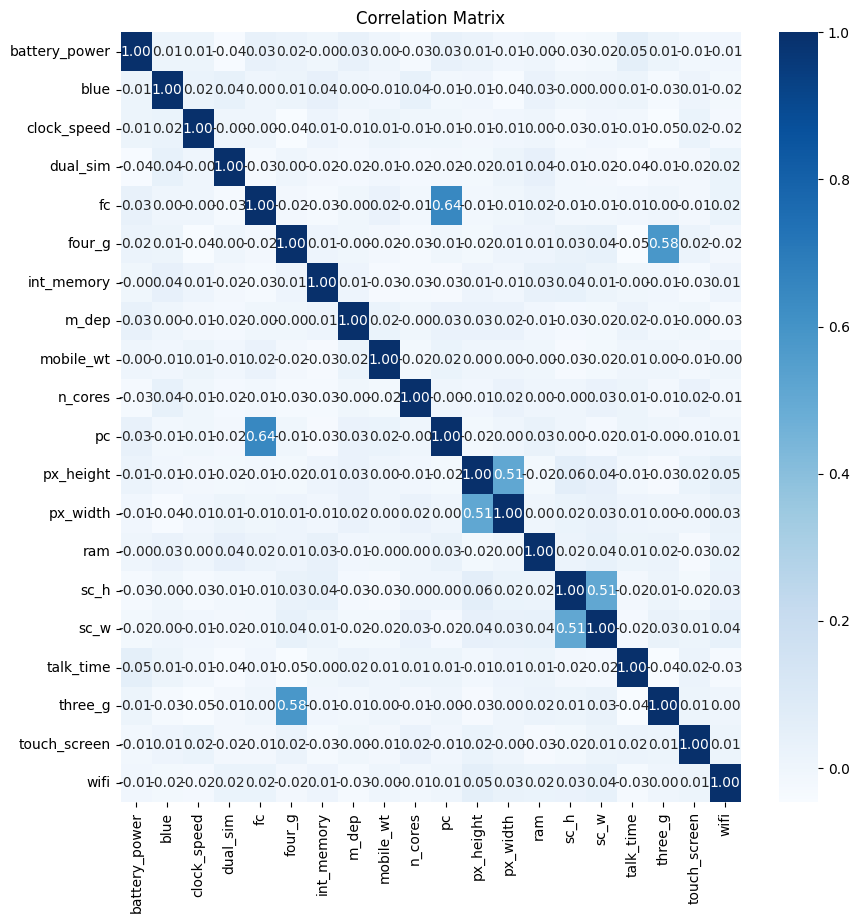

In [61]:
X = data.drop('price_range', axis=1)
y = data['price_range']

transformer = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), X.select_dtypes('number').columns)], 
    remainder='passthrough'
    )
X_transformed = transformer.fit_transform(X)
print(X_transformed)
corr_matrix = pd.DataFrame(X_transformed, columns=X.columns).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

[[-0.90259726 -0.9900495   0.83077942 ... -1.18648639 -1.07303316
  -0.22468605]
 [-0.49513857  1.0100505  -1.2530642  ... -0.8694136   1.07754147
  -0.38092598]
 [-1.5376865   1.0100505  -1.2530642  ... -0.65803173  1.52135531
  -0.75850582]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ... -1.08079546  0.61637375
  -0.92776575]
 [ 0.62252745 -0.9900495  -0.76274805 ... -0.5523408  -0.81988539
   1.29865332]
 [-1.65833069  1.0100505   0.58562134 ...  0.71595036 -0.65225095
  -0.05542612]]


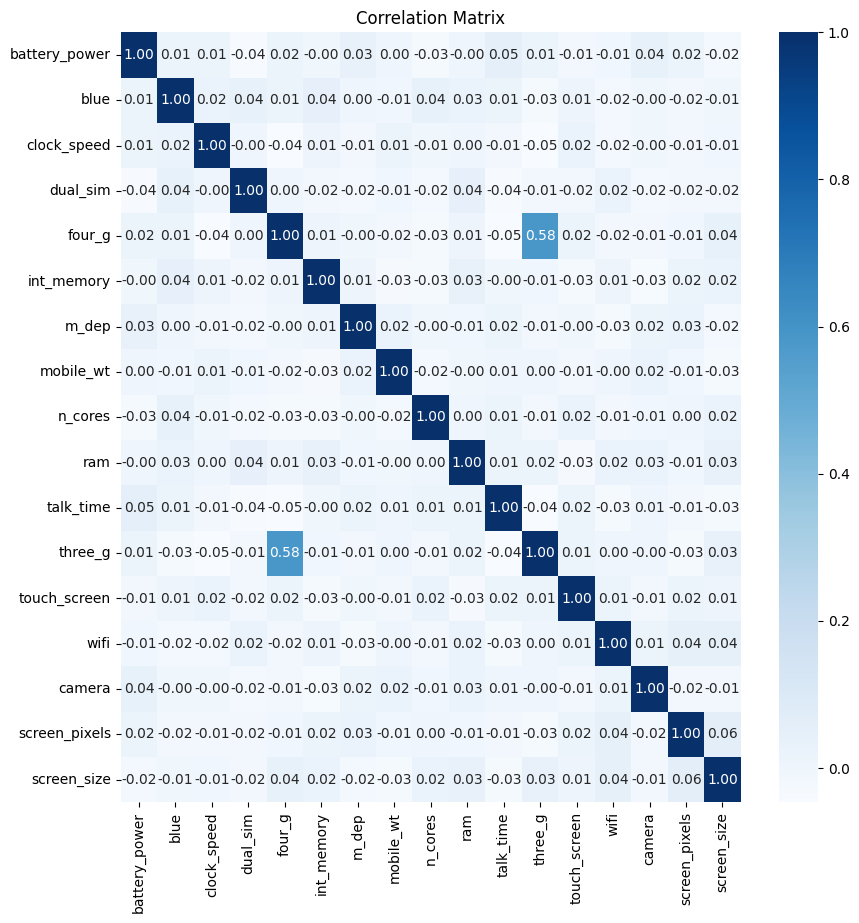

In [62]:
data = pd.read_csv('/Users/xin/Files/Current_studies/machine_learning/project/data/train.csv')
data['camera'] = data['fc'] + data['pc']
data['screen_pixels'] = data['px_width'] * data['px_height']
data['screen_size'] = data['sc_w'] * data['sc_h']

data.drop(['fc','pc', 'px_width', 'px_height', 'sc_w', 'sc_h'], axis=1, inplace=True)

X = data.drop('price_range', axis=1)
y = data['price_range']

transformer = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), X.select_dtypes('number').columns)], 
    remainder='passthrough'
    )
X_transformed = transformer.fit_transform(X)
print(X_transformed)
corr_matrix = pd.DataFrame(X_transformed, columns=X.columns).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [63]:
data.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
screen_pixels    0.176240
int_memory       0.044435
screen_size      0.041248
camera           0.031621
three_g          0.023611
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

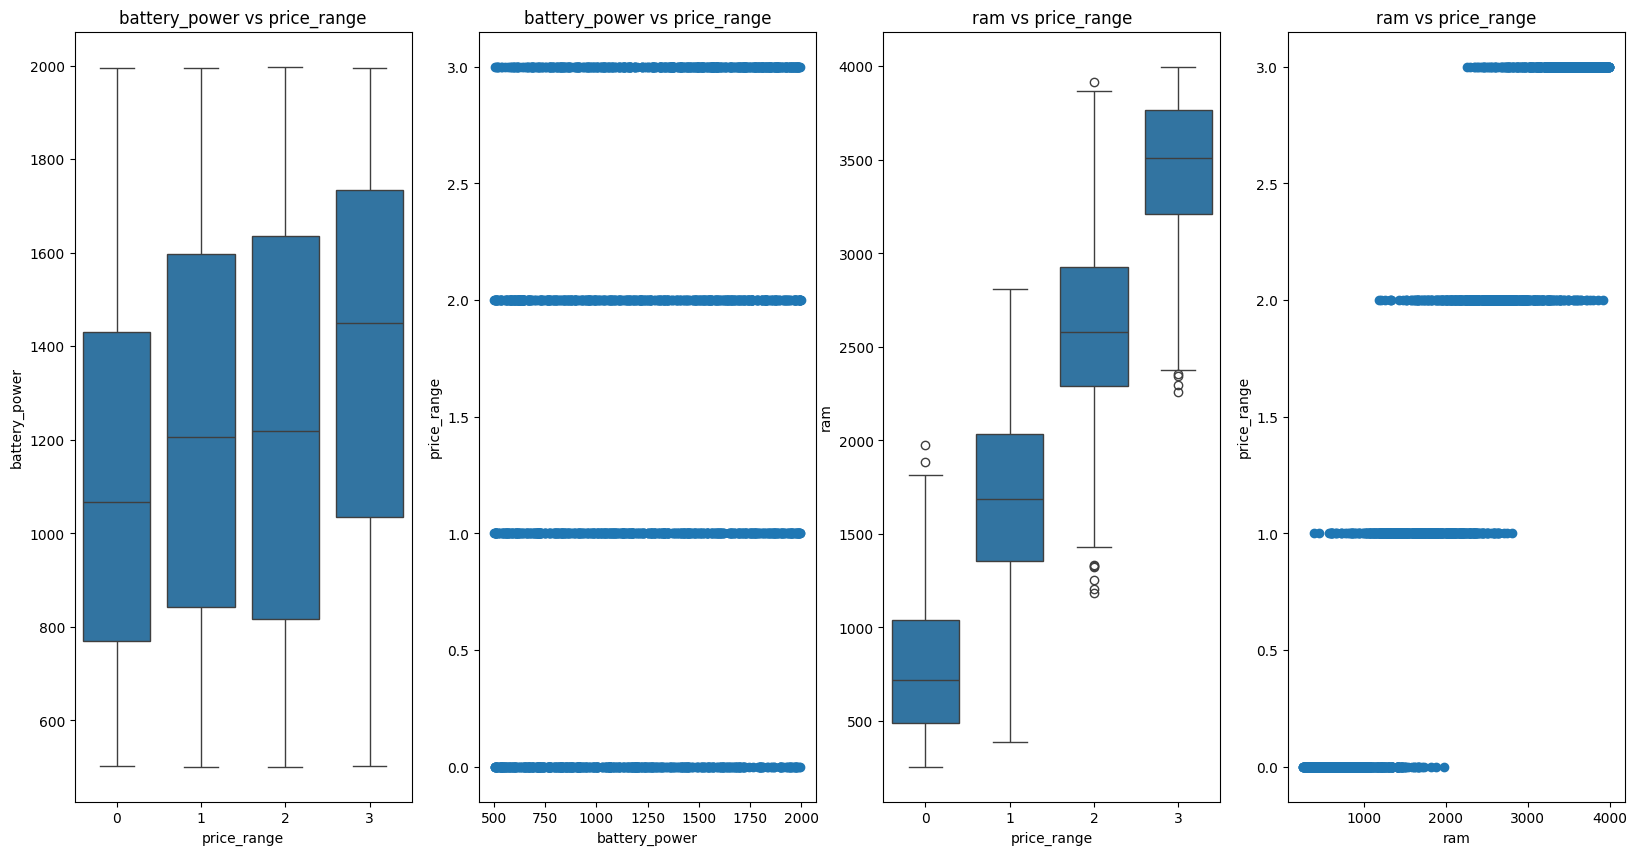

In [64]:
fig, ax = plt.subplots(1,4, figsize=(20,10))

sns.boxplot(x="price_range", y="battery_power", data=data, ax=ax[0]).set_title("battery_power vs price_range")

ax[1].scatter(data["battery_power"], data["price_range"])
ax[1].set_xlabel("battery_power")
ax[1].set_ylabel("price_range")
ax[1].set_title("battery_power vs price_range")

sns.boxplot(x="price_range", y="ram", data=data, ax=ax[2]).set_title("ram vs price_range")

ax[3].scatter(data["ram"], data["price_range"])
ax[3].set_xlabel("ram")
ax[3].set_ylabel("price_range")
ax[3].set_title("ram vs price_range")

plt.show()


/var/folders/6_/32t0th512j792mqtn7dgp1kh0000gn/T/ipykernel_17987/1373525366.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[feature][data['price_range'] == 0], color="lightblue")
/var/folders/6_/32t0th512j792mqtn7dgp1kh0000gn/T/ipykernel_17987/1373525366.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[feature][data['price_range'] == 1], color="cadetblue")
/var/folders/6_/32t0th512j792mqtn7dgp1kh0000gn/T/ipykernel_17987/1373525366.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[feature][data['price_range'] == 2], color="violet")
/var/folders/6_/32t0th512j792mqtn7dgp1kh0000gn/T/ipykernel_17987/1373525366.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable thi

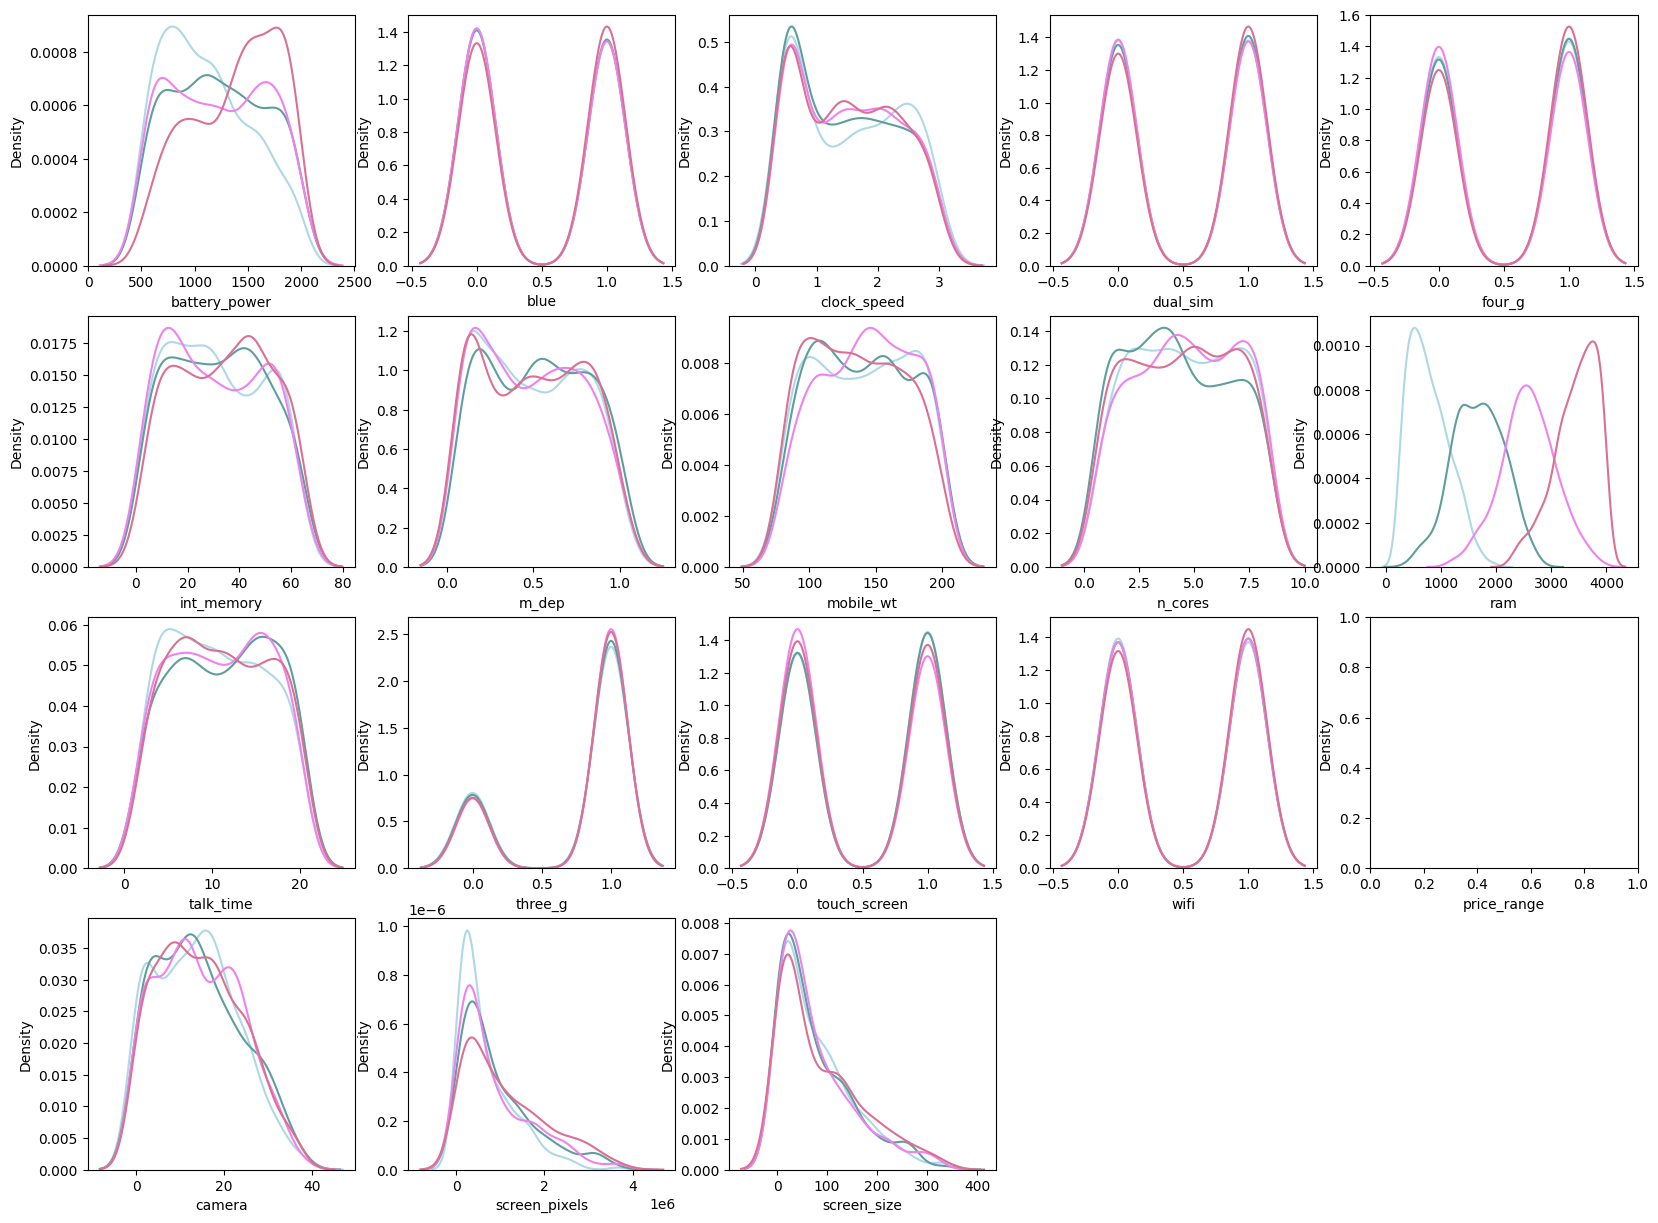

In [65]:
fig = plt.figure(figsize = (20,15))
for row, feature in enumerate(data.columns) :
    ax = fig.add_subplot(4,5,row+1)
    
    
    sns.kdeplot(data[feature][data['price_range'] == 0], color="lightblue")
    sns.kdeplot(data[feature][data['price_range'] == 1], color="cadetblue")
    sns.kdeplot(data[feature][data['price_range'] == 2], color="violet")
    sns.kdeplot(data[feature][data['price_range'] == 3], color="palevioletred")
plt.show()

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33)
lm = LinearRegression().fit(X_train, y_train)

y_pred_lm = lm.predict(X_test)
mse = rmse(y_test, y_pred_lm)
r2_score = r2_score(y_test, y_pred_lm)

print("Mean Squared Error: ", mse)
print("R2 Score: ", r2_score)


y_pred_lm = np.digitize(y_pred_lm, bins=[0, 1, 2, 3])
accuracy_lr = accuracy_score(y_test, y_pred_lm)

print("Accuracy: ", accuracy_lr)




Mean Squared Error:  0.33638115818678327
R2 Score:  0.911303257257838
Accuracy:  0.5060606060606061


In [67]:
"""
plt.figure()
for feature in X_train.columns:
    fig,ax = plt.subplots(1,2, figsize=(20,9))

    ax[0].scatter(X_train[feature], y_train, color='blue', s=10, label='train data')

    LR = LinearRegression().fit(X_train[[feature]], y_train)  # Linear Regression model training
    y_pred = LR.predict(X_train[[feature]])
    
    y_pred_val = LR.predict(X_val[[feature]]) # predict on validation data (for calculating mean squared error)
    mse = mean_squared_error(y_val, y_pred_val)   # mean squared error

    y_pred_val_round = [round(i) for i in y_pred_val]   # round the y_pred_val, confusion matrix
    cm = confusion_matrix(y_val, y_pred_val_round) 

    ax[0].plot(X_train[feature], y_pred, color= 'red', label = 'regression line')

    ax[0].text(0.5, 0.5, f"Mean Squared Error: {mse:.2f}", transform = ax[0].transAxes)
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Price Range')
    ax[0].set_title(f"{feature} vs price range")
    ax[0].legend(loc='lower right')

    sns.heatmap(cm, annot=True, ax=ax[1], fmt='g', cmap="Blues")

    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Confusion Matrix: {feature} vs price range')
    



    plt.show()
"""


'\nplt.figure()\nfor feature in X_train.columns:\n    fig,ax = plt.subplots(1,2, figsize=(20,9))\n\n    ax[0].scatter(X_train[feature], y_train, color=\'blue\', s=10, label=\'train data\')\n\n    LR = LinearRegression().fit(X_train[[feature]], y_train)  # Linear Regression model training\n    y_pred = LR.predict(X_train[[feature]])\n    \n    y_pred_val = LR.predict(X_val[[feature]]) # predict on validation data (for calculating mean squared error)\n    mse = mean_squared_error(y_val, y_pred_val)   # mean squared error\n\n    y_pred_val_round = [round(i) for i in y_pred_val]   # round the y_pred_val, confusion matrix\n    cm = confusion_matrix(y_val, y_pred_val_round) \n\n    ax[0].plot(X_train[feature], y_pred, color= \'red\', label = \'regression line\')\n\n    ax[0].text(0.5, 0.5, f"Mean Squared Error: {mse:.2f}", transform = ax[0].transAxes)\n    ax[0].set_xlabel(feature)\n    ax[0].set_ylabel(\'Price Range\')\n    ax[0].set_title(f"{feature} vs price range")\n    ax[0].legend(loc=

In [68]:
lg = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
y_pred = lg.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

print(f"Cross-Entropy Loss: {log_loss(y_test, lg.predict_proba(X_test)):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, lg.predict_proba(X_test), multi_class='ovo'):.2f}")

Accuracy score: 0.91
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       162
           1       0.93      0.87      0.89       157
           2       0.87      0.83      0.85       164
           3       0.90      0.97      0.93       177

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660

Cross-Entropy Loss: 0.25
ROC AUC Score: 0.99


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Text(50.722222222222214, 0.5, 'True label')

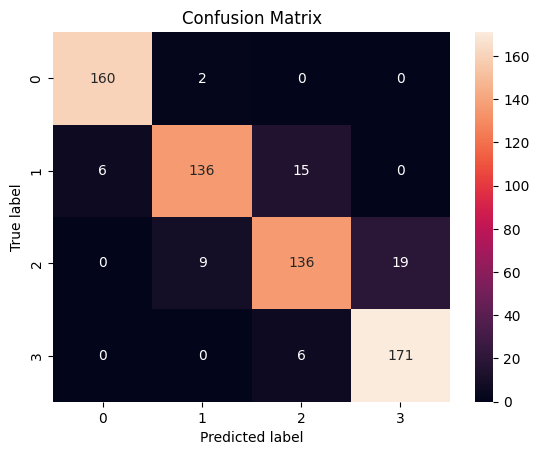

In [69]:
conf_max = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_max, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
